In [2]:
import tensorflow as tf

import numpy as np
import os
import time
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 

C:\Users\daabv\miniconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
path_to_file = tf.keras.utils.get_file('Les_fleurs_du_mal_Baudelaire', 'https://raw.githubusercontent.com/AmelNozieres/NLP_Generate_poems/master/Les_fleurs_du_mal_Baudelaire')

In [5]:
tokenizer = Tokenizer()
data = open(path_to_file, 'rb').read().decode(encoding='utf-8')
corpus = data.lower().split("\n")

print(corpus[:100])
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

['la sottise, l’erreur, le péché, la lésine,', 'occupent nos esprits et travaillent nos corps,', 'et nous alimentons nos aimables remords,', 'comme les mendiants nourrissent leur vermine.', 'nos péchés sont têtus, nos repentirs sont lâches ;', 'nous nous faisons payer grassement nos aveux,', 'et nous rentrons gaiement dans le chemin bourbeux,', 'croyant par de vils pleurs laver toutes nos taches.', 'sur l’oreiller du mal c’est satan trismégiste', 'qui berce longuement notre esprit enchanté,', 'et le riche métal de notre volonté', 'est tout vaporisé par ce savant chimiste.', 'c’est le diable qui tient les fils qui nous remuent !', 'aux objets répugnants nous trouvons des appas ;', 'chaque jour vers l’enfer nous descendons d’un pas,', 'sans horreur, à travers des ténèbres qui puent.', 'ainsi qu’un débauché pauvre qui baise et mange', 'le sein martyrisé d’une antique catin,', 'nous volons au passage un plaisir clandestin', 'que nous pressons bien fort comme une vieille orange.', 'serré, f

In [6]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [8]:
print(tokenizer.word_index)

{'et': 1, 'de': 2, 'le': 3, 'la': 4, 'les': 5, 'des': 6, 'un': 7, 'qui': 8, 'dans': 9, 'comme': 10, 'à': 11, 'je': 12, 'que': 13, 'en': 14, 'du': 15, 'au': 16, 'sur': 17, 'mon': 18, 'où': 19, 'ce': 20, 'tu': 21, 'pour': 22, 'son': 23, 'une': 24, 'se': 25, 'd’un': 26, 'ô': 27, 'ton': 28, 'est': 29, 'tout': 30, 'sans': 31, 'cœur': 32, 'plus': 33, 'par': 34, 'nous': 35, 'aux': 36, 'ses': 37, 'il': 38, '—': 39, 'ces': 40, 'ma': 41, 'ne': 42, 'tes': 43, 'vous': 44, 'sa': 45, 'yeux': 46, 'avec': 47, 'ta': 48, 'dont': 49, 'leurs': 50, 'me': 51, 'pas': 52, 'toi': 53, 'ciel': 54, 'quand': 55, 'sous': 56, 'ou': 57, 'mes': 58, 'c’est': 59, 'te': 60, 'âme': 61, 'vers': 62, 'leur': 63, 'si': 64, 'ainsi': 65, 'sont': 66, 'soleil': 67, 'fait': 68, 'moi': 69, 'elle': 70, 'nos': 71, 'mais': 72, 'qu’un': 73, 'plein': 74, 'corps': 75, 'jamais': 76, 'vieux': 77, 'beauté': 78, 'd’une': 79, 'bien': 80, 'cette': 81, 'tous': 82, 'ils': 83, 'soir': 84, 'mort': 85, 'a': 86, 'toujours': 87, 'vos': 88, 'nuit': 89

In [11]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(predictors, label, epochs=100, verbose=1)
print(model.summary())
print(model)

Epoch 1/100
634/634 [==============================] - 29s 43ms/step - loss: 7.3847 - accuracy: 0.0456
Epoch 2/100
634/634 [==============================] - 28s 44ms/step - loss: 6.3761 - accuracy: 0.0811
Epoch 3/100
634/634 [==============================] - 29s 45ms/step - loss: 5.3748 - accuracy: 0.1127
Epoch 4/100
634/634 [==============================] - 29s 45ms/step - loss: 4.3298 - accuracy: 0.1817
Epoch 5/100
634/634 [==============================] - 29s 45ms/step - loss: 3.7590 - accuracy: 0.2575
Epoch 6/100
634/634 [==============================] - 30s 47ms/step - loss: 3.3442 - accuracy: 0.3172
Epoch 7/100
634/634 [==============================] - 31s 49ms/step - loss: 2.4116 - accuracy: 0.4512
Epoch 8/100
634/634 [==============================] - 30s 47ms/step - loss: 2.0056 - accuracy: 0.5324
Epoch 9/100
634/634 [==============================] - 30s 47ms/step - loss: 1.7495 - accuracy: 0.5871
Epoch 10/100
634/634 [==============================] - 30s 47ms/step - l

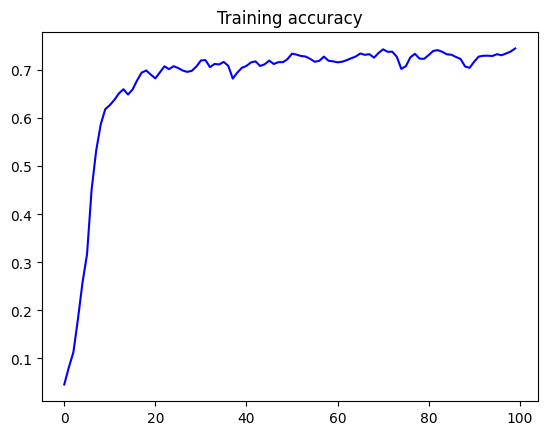

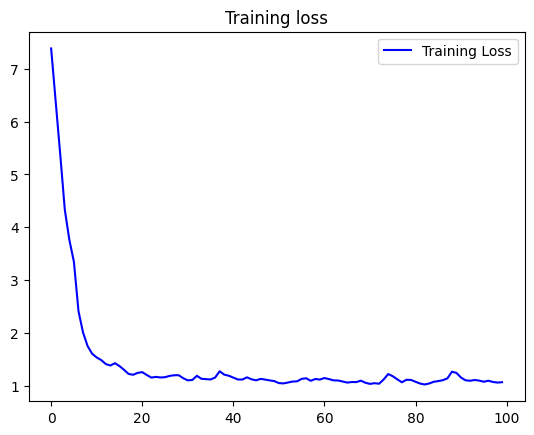

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [13]:
model.save('baudelaire.hdf5')

In [1]:
model = load_model("baudelaire.hdf5")

NameError: name 'load_model' is not defined

In [30]:
seed_text = "Je pense au"
next_words = 50

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
	#print(predicted)
	output_word = "_"
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	#print("o : " + str(output_word)+ " - " + str(len(output_word)))
	#print(ord(output_word[0]))
	#print(seed_text)
	if ord(output_word[0]) != 13:
		seed_text = seed_text + " " + str(output_word)

        
print(str(seed_text).replace("»", ""))

Je pense au dévouement qui leur prêtait ses ailes de corbeau et  interdit des morts et fatale gueuserie démence    cœur  vipères revivre  incivil  toilette  tiède orientale profonde unité ensorcelés  inféconde    chère indolente  blés  —  — folle ce cœur
